In [1]:
# importing all the neccessary library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


In [2]:
# loading the dataset
df=pd.read_csv('digit-recognizer_train.csv')

In [3]:
# sample values
df.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24583,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32153,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28075,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39303,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8075,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37582,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23865,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26181,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31067,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12788,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# shape of the dataset
df.shape

(42000, 785)

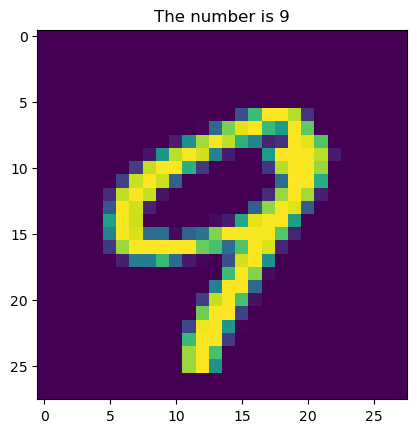

In [5]:
a=df.iloc[100,0]
plt.title(f'The number is {a}')
plt.imshow(df.iloc[100,1:].values.reshape(28,28))

In [6]:
# input features
x=df.iloc[:,1:]
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Label
y=df.iloc[:,0]
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=122)


In [9]:
x_train.shape

(33600, 784)

In [10]:
x_test.shape

(8400, 784)

In [11]:
# implementation using KNN without PCA
knn=KNeighborsClassifier(n_neighbors=5)

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start_time=time.time()
y_pred=knn.predict(x_test)
end_time=time.time()
time=end_time-start_time
print(f"Time taken to run {time}")

Time taken to run 7.12606143951416


In [14]:
# predicted values 
y_pred

array([4, 1, 6, ..., 0, 6, 6], dtype=int64)

In [15]:
# accuracy
knn.score(x_test,y_test)

0.9660714285714286

In [16]:
# implementation using PCA 
pca=PCA(n_components=250)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [17]:
# implementation of KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca,y_train)


KNeighborsClassifier()

In [18]:
import time
start_time1=time.time()
y_pred=knn.predict(x_test_pca)
end_time1=time.time()
time1=end_time1-start_time1
print(f"Time taken to run {time1}")

Time taken to run 0.9577310085296631


In [19]:
#predicted Values
y_pred

array([4, 1, 6, ..., 0, 6, 6], dtype=int64)

In [20]:
knn.score(x_test_pca,y_test)

0.965952380952381

In [21]:
# finding best number of Components 
from tabulate import tabulate
accuracy=[]
time3=[]
results = []

for i in range(1,785,10):
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train)
    x_test_pca=pca.transform(x_test)
    
    
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train_pca,y_train)
    
    
    start_time3=time.time()
    
    knn.predict(x_test_pca)
    
    end_time3=time.time()
    t=end_time3-start_time3
    time3.append(t)
    
    score=knn.score(x_test_pca,y_test)
    accuracy.append(score)
    
    results.append([i, score,t])
    
headers = ["Components","Accuracy", "time taken"]
print(tabulate(results, headers=headers, tablefmt="grid"))

+--------------+------------+--------------+
|   Components |   Accuracy |   time taken |
+==============+============+==============+
|            1 |   0.274048 |     0.119032 |
+--------------+------------+--------------+
|           11 |   0.931548 |     0.761669 |
+--------------+------------+--------------+
|           21 |   0.96619  |     0.388778 |
+--------------+------------+--------------+
|           31 |   0.972262 |     0.466025 |
+--------------+------------+--------------+
|           41 |   0.973333 |     0.446862 |
+--------------+------------+--------------+
|           51 |   0.973452 |     0.522277 |
+--------------+------------+--------------+
|           61 |   0.9725   |     0.495459 |
+--------------+------------+--------------+
|           71 |   0.97119  |     0.549212 |
+--------------+------------+--------------+
|           81 |   0.96869  |     0.5683   |
+--------------+------------+--------------+
|           91 |   0.968452 |     0.574092 |
+---------

In [22]:
# Making Pipeline
from sklearn.pipeline import Pipeline

In [23]:
pca = PCA(n_components=51)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

In [25]:
pipe = Pipeline([
    ('pca',pca),
    ('knn',knn)
])

In [26]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=51)), ('knn', KNeighborsClassifier())])

In [27]:
y_pred = pipe.predict(x_test)
y_pred

array([4, 1, 6, ..., 0, 6, 6], dtype=int64)

In [28]:
pipe.score(x_test,y_test)

0.9735714285714285

In [29]:
#Export
import pickle
pickle.dump(pipe,open('digit_recognizer.pkl','wb'))